IMPORD REQUIRED LIBREARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATASETS

In [2]:
data=pd.read_csv('/content/dataset.csv', sep=',', encoding='latin-1')
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
data.shape

(60681, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60681 entries, 0 to 60680
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         60681 non-null  int64 
 1   Sentiment      60681 non-null  int64 
 2   SentimentText  60681 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [5]:
data['SentimentLen']=data['SentimentText'].str.len()
data.head()

,ItemID,Sentiment,SentimentText,SentimentLen
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53


In [6]:
data=data.drop(['ItemID', 'SentimentText'], axis=1)
data.head()

,Sentiment,SentimentLen
0,0,61
1,0,51
2,1,37
3,0,132
4,0,53


In [7]:
sentiment_data=data['Sentiment']
sentiment_data.value_counts()

1    33147
0    27534
Name: Sentiment, dtype: int64

DATA VISULIZATION

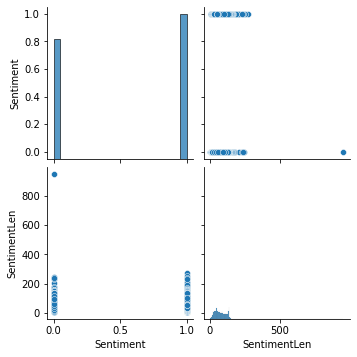

In [8]:
sns.pairplot(data)
plt.show()

DATA SEPRATION

In [9]:
X=data['SentimentLen'].values.reshape(-1, 1)
Y=data['Sentiment'].values.reshape(-1, 1)

In [10]:
X

array([[ 61],
       [ 51],
       [ 37],
       ...,
       [ 95],
       [ 56],
       [102]])

In [11]:
X.shape

(60681, 1)

In [12]:
Y.shape

(60681, 1)

SPLIT THE DATASETS

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.25, random_state=0) 

In [14]:
x_train

array([[ 86],
       [ 49],
       [131],
       ...,
       [136],
       [ 64],
       [ 97]])

In [15]:
x_train.shape

(45510, 1)

In [16]:
x_test.shape

(15171, 1)

In [17]:
y_train.shape

(45510, 1)

In [18]:
y_test.shape

(15171, 1)

MODEL SALECTION

IT'S A CLASSIFICATION TYPE USE A LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()  
classifier.fit(x_train, y_train)

print("Training complete.")

Training complete.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_pred_train=classifier.predict(x_train)
print('Predict y for x_train datasts:''\n' ,
      y_pred_train)
print('\n')
y_pred_test=classifier.predict(x_test)
print('Predict y for x_test datasts:''\n' ,
      y_pred_test)

Predict y for x_train datasts:
 [1 1 1 ... 1 1 1]


Predict y for x_test datasts:
 [1 1 1 ... 1 1 1]


In [21]:
print(y_pred_train.shape)
print(y_pred_test.shape)

(45510,)
(15171,)


In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train=confusion_matrix(y_train, y_pred_train)
print('confusion_matrix:\n', confusion_matrix_train)

confusion_matrix_test=confusion_matrix(y_test, y_pred_test)
print('confusion_matrix:\n', confusion_matrix_test)


confusion_matrix:
 [[    0 20568]
 [    0 24942]]
confusion_matrix:
 [[   1 6965]
 [   0 8205]]


In [23]:
from sklearn.metrics import accuracy_score

accuracy_score_train=accuracy_score(y_train, y_pred_train)
accuracy_score_test=accuracy_score(y_test, y_pred_test)

print('accuracy score of train datasets:', accuracy_score_train)
print('accuracy score of test datasets:', accuracy_score_test)

accuracy score of train datasets: 0.5480553724456163
accuracy score of test datasets: 0.5409004020829213


In [24]:
from sklearn.metrics import classification_report
print('classification report for train datasets:\n', classification_report(y_train, y_pred_train))

print('classification report for test datasets:\n', classification_report(y_test, y_pred_test))

classification report for train datasets:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20568
           1       0.55      1.00      0.71     24942

    accuracy                           0.55     45510
   macro avg       0.27      0.50      0.35     45510
weighted avg       0.30      0.55      0.39     45510

classification report for test datasets:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      6966
           1       0.54      1.00      0.70      8205

    accuracy                           0.54     15171
   macro avg       0.77      0.50      0.35     15171
weighted avg       0.75      0.54      0.38     15171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


HYPERPARAMETER TUNNING

IN LOGISTIC REGRESSION AND CHECK THE ACCURACY SCORE IN X_TRAIN

In [25]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.548055 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548055 (0.000088) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548055 (0.000088) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.548055 (0.000088) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.548055 (0.000088) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548055 (0.000088) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.548055 (0.000088) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.548055 (0.000088) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548055 (0.000088) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.548055 (0.000088) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.548055 (0.000088) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548055 (0.000088) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.548055 (0.000088) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.548055 (0.000088) wit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IN RIDGECLASSIFIER AND CHECK ACCURACY SCORE OF X_TRAIN

In [26]:
from sklearn.linear_model import RidgeClassifier  
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
classifier = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.548055 using {'alpha': 0.1}
0.548055 (0.000088) with: {'alpha': 0.1}
0.548055 (0.000088) with: {'alpha': 0.2}
0.548055 (0.000088) with: {'alpha': 0.3}
0.548055 (0.000088) with: {'alpha': 0.4}
0.548055 (0.000088) with: {'alpha': 0.5}
0.548055 (0.000088) with: {'alpha': 0.6}
0.548055 (0.000088) with: {'alpha': 0.7}
0.548055 (0.000088) with: {'alpha': 0.8}
0.548055 (0.000088) with: {'alpha': 0.9}
0.548055 (0.000088) with: {'alpha': 1.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IN KNCLASSIFIER AND CHECK IN ACCURACY OF X_TRAIN

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
classifier = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.519791 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.506629 (0.008030) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.506629 (0.008030) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.508233 (0.009605) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.508159 (0.009619) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.508071 (0.009963) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.507962 (0.010015) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.512166 (0.009767) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.512034 (0.009895) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.512818 (0.010455) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.512686 (0.010596) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.513733 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




1. THE MAXIMUM ACCURACY OF X_TRAIN IS LOGISTIC REGRESSION
2. LOGISTIC REGRESSION IS USE TO PREDECT THE MODEL

